## Imports and Utility Functions

In [119]:
import cv2
from typing import List, Tuple, Optional, NamedTuple
from matplotlib import pyplot as plt
import numpy as np

# Custom types
Image = np.ndarray

class Line(NamedTuple):
    x1: int
    y1: int
    x2: int
    y2: int

class Point(NamedTuple):
    x: int
    y: int

# Helper Functions
def plot_image(img: Image, plot_title: str, color_conversion=cv2.COLOR_BGR2RGB):
    '''Plots an image, converting it to an acceptable color space (i.e., grayscale or RGB) as needed.'''
    if color_conversion != None:
        img = cv2.cvtColor(img, color_conversion)
    
    plt.imshow(img)
    plt.title(plot_title)
    plt.axis('off')

## Detecting White Pixels

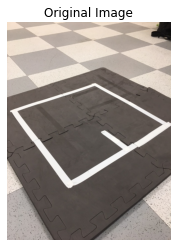

In [120]:
# Load original image
img = cv2.imread('test-images/simple-maze.jpg')
plot_image(img, 'Original Image')

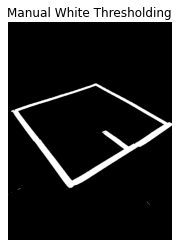

In [121]:
def manual_white_threshold(img):
    '''Selects all white pixels in an image using HSV thresholding'''
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    return cv2.inRange(hsv, (0, 0, 215), (180, 15, 255), cv2.THRESH_BINARY)

plot_image(manual_white_threshold(img), 'Manual White Thresholding')

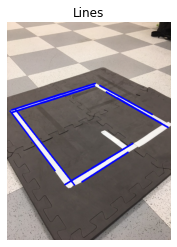

In [132]:
def detect_lines(img: Image) -> List[Line]:
    '''
    Uses a Hough Transform to detect lines in an image. 

    The Hough transform works by
        - Applying edge detection, which returns a list
          of (x, y) pixels that are edges
        - Create a grid of possible lines specified in polar coordinates (p, theta)
        - For each edge pixel (x, y), determine which line it's most likely to contribute
          to and increment the corresponding grid value
        - Threshold the grid to find the most likely lines
    '''
    edges = cv2.Canny(img, 50, 200)
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 30, minLineLength=50, maxLineGap=20)
    
    return [Line(*line[0]) for line in lines]

def draw_lines(img: Image, lines: List[Line], color=(255, 0, 0)) -> Image:
    '''Draws a list of lines on an image'''
    if lines is None or len(lines) == 0:
        return img

    copy = img.copy()

    for line in lines:
        cv2.line(copy, (line.x1, line.y1), (line.x2, line.y2), color, 3)

    return copy

lines = detect_lines(manual_white_threshold(img))
plot_image(draw_lines(img, lines), 'Lines')